r^2 on test data : -0.5148835447539641
mse on test data : 5.842405459587561
r^2 on test data : -0.33978748237581957
mse on test data : 5.167117781975022


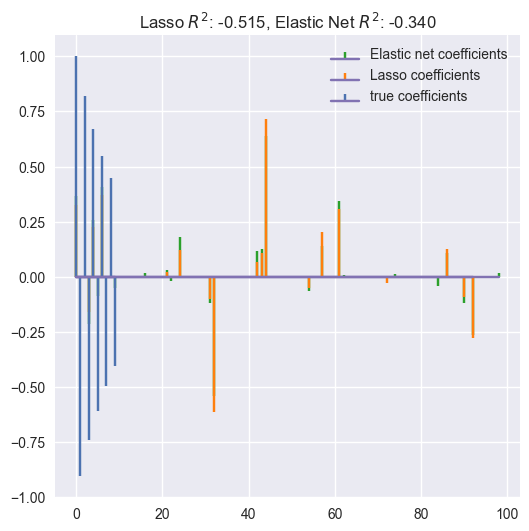

In [15]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入线性回归模型
from sklearn.linear_model import Lasso, ElasticNet
# 导入模型评估的工具
from sklearn.metrics import mean_squared_error, r2_score
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 设置样本量和维度
n_samples, n_features = 50, 100
# 设置随机数
np.random.seed(10)
# 生成X
X = np.random.randn(n_samples, n_features)
# 生成真实的系数
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
# 对系数产生稀疏性
coef[10:] = 0
# 生成y
y = np.dot(X, coef) + 0.01 * np.random.normal(size=n_samples)
# 划分数据集
n_samples = X.shape[0]
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]
# 设置lasso的惩罚系数
alpha = 0.1
# 构建lasso模型
lasso = Lasso(alpha=alpha)
# 模型拟合
lasso.fit(X_train, y_train)
# 预测
y_pred = lasso.predict(X_test)
# R方测试集
r2 = r2_score(y_test, y_pred)
# MSE测试集
mse = mean_squared_error(y_test, y_pred)
print("r^2 on test data : {}".format(r2))
print("mse on test data : {}".format(mse))
# 构建弹性网模型
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
# 模型拟合
enet.fit(X_train, y_train)
# 预测
y_pred_enet = enet.predict(X_test)
r2_enet = r2_score(y_test, y_pred_enet)
mse_enet = mean_squared_error(y_test, y_pred_enet)
print("r^2 on test data : {}".format(r2_enet))
print("mse on test data : {}".format(mse_enet))
# 开始绘图
fig, ax = plt.subplots(figsize=(6,6))
m, s, _ = ax.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
)
plt.setp([m, s], color="#2ca02c")
m, s, _ = ax.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
)
plt.setp([m, s], color="#ff7f0e")
ax.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
)
ax.legend(loc="best")
ax.set_title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2, r2_enet)
)
plt.show()
fig.savefig("../codeimage/code5.pdf")
